In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from plot_decision_regions import plot_decision_regions

# Подготовка данных для обучения 

In [2]:
df = datasets.load_iris()
X, y = df.data[:, [2, 3]], df.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

# Обучение Персептрона
`цель` - свести к минимуму ошибки неправильной классификации

In [4]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter_no_change=40, eta0=0.1, random_state=42)
ppn.fit(X_train_std, y_train)
ppn.score(X_test_std, y_test)

0.8888888888888888

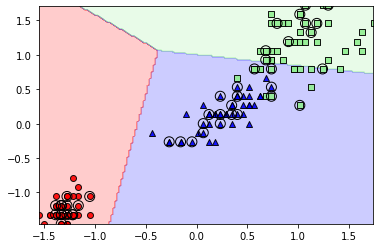

In [5]:
X_combo = np.vstack((X_train_std, X_test_std))
y_combo = np.hstack((y_train, y_test))
plot_decision_regions(X_combo, y_combo, classifier=ppn, test_idx=range(len(X_train_std),len(X_combo)))

# Обучение логистической регрессии
[Об отличие от линейной](https://issue.life/questions/12146914)<br>
С помощью `C` можно управлять регуляризацией, чем больше `С`, тем больше штрафы за ошибки

In [101]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100, random_state=42)
lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test)

0.9777777777777777

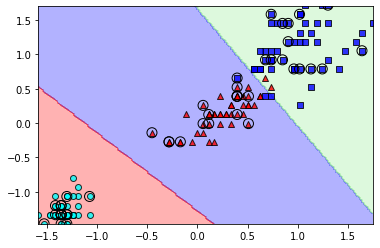

In [102]:
plot_decision_regions(X_combo, y_combo, classifier=lr, test_idx=range(len(X_train_std),len(X_combo)))

## - *LR* умеет прогнозировать вероятность

In [103]:
lr.predict_proba(X_test_std[:5, :])

array([[1.91603899e-03, 9.98052171e-01, 3.17904724e-05],
       [2.35004615e-08, 3.51056833e-02, 9.64894293e-01],
       [9.99439383e-01, 5.60617458e-04, 4.10496389e-19],
       [9.99585206e-01, 4.14794234e-04, 1.61342800e-19],
       [2.16967595e-02, 9.78302803e-01, 4.37162275e-07]])

# Метод опорных векторов
`цель` - довести до максимума растояние между границей решения и опорными векторами (обучающие образцы)

In [104]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=100, random_state=42)
svm.fit(X_train_std, y_train)
svm.score(X_test_std, y_test)

0.9777777777777777

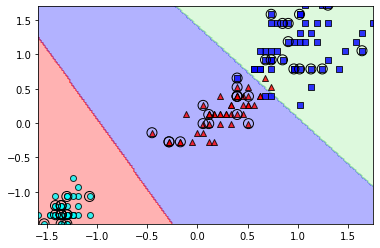

In [105]:
plot_decision_regions(X_combo, y_combo, classifier=svm, test_idx=range(len(X_train_std),len(X_combo)))

# Стохастический градиентный спуск 

In [106]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

In [107]:
ppn.fit(X_train_std, y_train)
ppn.score(X_test_std, y_test)

0.9111111111111111